<a href="https://colab.research.google.com/github/mk17250/CE888--Lab-6-/blob/main/CE888_Lab_6_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')


In [66]:
URL = "https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv"
URL2 = "https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv"

In [99]:
df = pd.read_csv(URL)
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [17]:
df1 = pd.read_csv(URL2)
df1

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [105]:
# Fetch data into x and y variables
x=df.iloc[:,1:] # Covariates or input
y=df.iloc[:,:1] # Labels or classes or output
print(x.columns)
print(y.columns)

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
Index(['country'], dtype='object')


In [103]:
df.shape

(167, 10)

In [107]:
x = x.values
y = y.values

In [106]:
x.shape

(167, 9)

In [71]:
y.shape

(167, 1)

In [116]:
y = y.flatten()

In [122]:
y.shape

(167,)

In [123]:
x

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [119]:
y

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [74]:
##df = df.drop('country' , axis = 1, inplace = False)


In [75]:
#print(df)#

     child_mort  exports  health  ...  life_expec  total_fer   gdpp
0          90.2     10.0    7.58  ...        56.2       5.82    553
1          16.6     28.0    6.55  ...        76.3       1.65   4090
2          27.3     38.4    4.17  ...        76.5       2.89   4460
3         119.0     62.3    2.85  ...        60.1       6.16   3530
4          10.3     45.5    6.03  ...        76.8       2.13  12200
..          ...      ...     ...  ...         ...        ...    ...
162        29.2     46.6    5.25  ...        63.0       3.50   2970
163        17.1     28.5    4.91  ...        75.4       2.47  13500
164        23.3     72.0    6.84  ...        73.1       1.95   1310
165        56.3     30.0    5.18  ...        67.5       4.67   1310
166        83.1     37.0    5.89  ...        52.0       5.40   1460

[167 rows x 9 columns]


In [114]:
#### Cluster the data using K mean algorithm 

km=cluster.KMeans(n_clusters=3)
km.fit(df.iloc[:,1:])
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

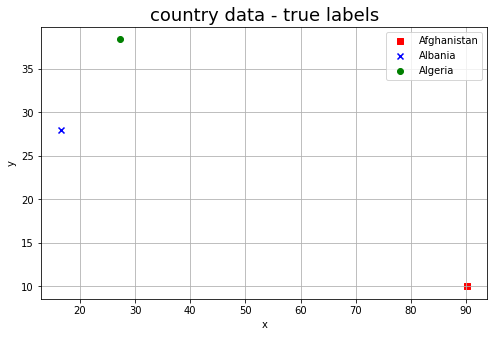

In [117]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

plt.figure(figsize=(8,5))
plt.title("country data - true labels", fontsize=18)
plt.grid(True)
for l, c, m in zip(np.unique(y), colors, markers):
  plt.scatter(x[y == l, 0], x[y == l, 1], c=c, label=l, marker=m)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

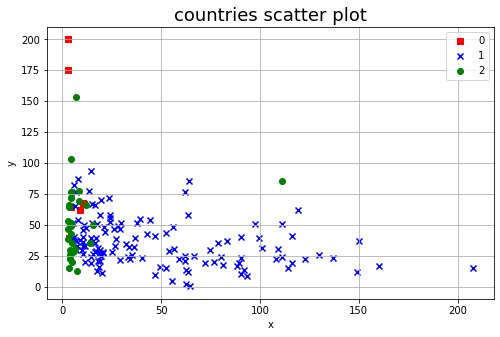

In [121]:
plt.figure(figsize=(8,5))
plt.title("countries scatter plot", fontsize=18)
plt.grid(True)
for l, c, m in zip(np.unique(km.labels_), colors, markers):
   plt.scatter(x[km.labels_ == l, 0], 
                x[km.labels_ == l, 1], 
                c=c, label=l, marker=m)
   plt.xlabel('x')
   plt.ylabel('y')
   plt.legend()

In [124]:
elements_count = {}
for element in km.labels_:
   if element in elements_count:
      elements_count[element] += 1
   else:
      elements_count[element] = 1
for key, value in elements_count.items():
   print(f"{key}: {value}")

1: 128
2: 32
0: 7


In [134]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, km.labels_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [135]:
y_test

array([1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [136]:
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_train)))
print(pd.value_counts(pd.Series(y_test)))

1    128
2     32
0      7
dtype: int64
1    90
2    20
0     6
dtype: int64
1    38
2    12
0     1
dtype: int64


In [137]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [140]:
from sklearn.decomposition import PCA

In [141]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.47021433, 0.16963351, 0.12801735, 0.11402408, 0.06945094,
       0.02036785, 0.01149926, 0.00981024, 0.00698243])

In [143]:
# Complete this code for task 5
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.47021433 0.16963351]


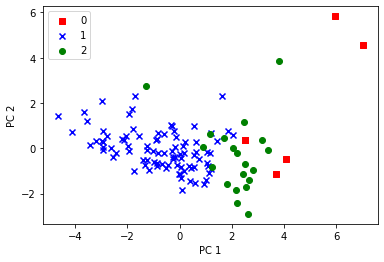

In [144]:
# Plot of two best principal components using y_train data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.savefig('PCA_con_LBL.png', dpi=300)

In [145]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [146]:
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train) # Train a Logistic regression model
pred_lab=lr.predict(X_test_pca) # Test on the test data
print("Accuracy on test is = %f" % (100 * accuracy_score(y_test, pred_lab)))

Accuracy on test is = 96.078431


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


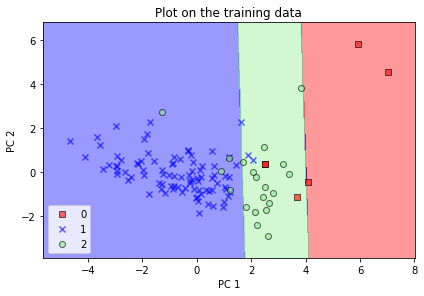

In [147]:
# Plot the decision region on training features and test labels using classifier you have trained above
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the training data')
plt.savefig('TRAIN_CLASS.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


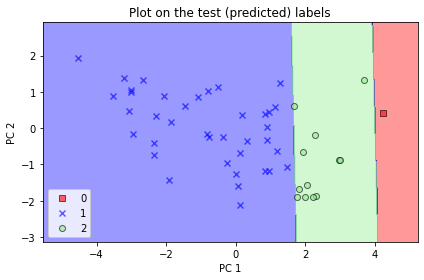

In [149]:
plot_decision_regions(X_test_pca, pred_lab, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title('Plot on the test (predicted) labels')
plt.tight_layout()
plt.savefig('TEST_CLASS.png', dpi=300)
plt.show()